# Домашнее творческое задание

**на тему: "Моделирование коэффициента естественного прироста населения по регионам РФ"**

**Выполнил: Белянинов Илья | Группа ПМ22-1**

In [1]:
import scipy.stats as sts
import numpy as np
import pandas as pd
import sympy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from linearmodels import RandomEffects
from linearmodels.panel import PanelOLS, PooledOLS
import statsmodels.api as sm
import statsmodels.stats.outliers_influence as oi

warnings.filterwarnings("ignore")

# Введение

Рождаемость играет ключевую роль в формировании демографической ситуации любого государства, оказывая значительное влияние на его социальное и экономическое развитие. В 2024 году, объявленном в России Годом семьи, внимание к вопросам рождаемости и демографической динамики становится особенно актуальным. В условиях стремительного изменения социально-экономических условий важно не только понимать текущую ситуацию, но и уметь прогнозировать будущие тенденции.

Особую значимость этому исследованию придает тот факт, что суммарный коэффициент рождаемости в России за 2023 год оказался на минимуме за последние 17 лет. Это подчеркивает необходимость глубокого анализа текущих демографических процессов и разработки эффективных мер государственной политики для их улучшения.

Моделирование коэффициента естественного прироста представляет собой важную научную и практическую задачу. Этот коэффициент является индикатором естественного изменения численности населения и отражает баланс между рождаемостью и смертностью. Понимание факторов, влияющих на коэффициент естественного прироста, позволяет формировать эффективную государственную политику, направленную на улучшение демографической ситуации, укрепление семейных ценностей и повышение качества жизни населения.

В данной работе исследуются зависимости коэффициента естественного прироста от различных социально-экономических факторов. Исследование проводится на основе панельных данных, охватывающих период с 2018 по 2022 год, по 85 регионам Российской Федерации. Такой подход позволяет выявить региональные особенности и тенденции, а также сделать выводы, применимые для всей страны.

**Объект исследования**: демографическая ситуация в регионах Российской Федерации.

**Предмет исследования**: социально-экономические показатели, среди которых коэффициент естественного прироста, численность населения, уровень безработицы, среднедушевые денежные доходы населения, смертность населения в трудоспособном возрасте, удельный вес городского населения в общей численности населения, коэффициент миграционного прироста, соотношение браков и разводов, индексы потребительских цен, прерывания беременности.

**Цель**: смоделировать влияние выбранных социально-экономических показателей регионов на коэффициент естественного прироста с помощью построения моделей панельных данных, а также оценить качество полученных моделей, выбрать наилучшую и определить точность её прогнозирования.

**Задачи**:
1. Сбор необходимых данных и их описание.
2. Составление спецификации модели.
3. Провести анализ данных.
4. Построить модели панельных данных и оценить их качество.
5. Сравнить модели между собой.
6. Прогнозирование на основе выбранной модели, изобразить прогноз графически. 
7. Сделать выводы.

# Спецификация модели

В качестве эндогенной (зависимой) переменной выступает:

- **Y - Коэффициенты естественного прироста населения:** Это число на 1 000 человек населения, которое отражает разницу между рождаемостью и смертностью.

В качестве экзогенных (независимых) переменных выступают:

- **X1 - Численность населения:** Оценка численности населения на конец года в тысячах человек. Этот показатель может влиять на коэффициент естественного прироста, так как в более населённых регионах рождаемость и смертность могут проявляться по-разному. [2]

- **X2 - Уровень безработицы:** Определяется как отношение численности безработных к численности рабочей силы, выраженное в процентах. Высокий уровень безработицы может снижать коэффициент естественного прироста, так как экономическая нестабильность может отталкивать людей от принятия решений о рождении детей. [1]

- **X3 - Среднедушевые денежные доходы населения:** Исчисляются делением годового объема денежных доходов потребительских расходов на 12 и на среднегодовую численность населения, выражаются в рублях. Более высокие доходы могут способствовать увеличению коэффициента естественного прироста, так как улучшение экономического положения может стимулировать рост рождаемости. [5]

- **X4 - Смертность населения в трудоспособном возрасте:** Число умерших на 100 000 человек трудоспособного возраста. Потеря трудоспособных членов семьи может приводить к ухудшению финансового положения семей, снижению доходов и увеличению социальной нестабильности, что может отталкивать людей от рождения детей.

- **X5 - Удельный вес городского населения в общей численности населения:** Доля городского населения в процентах. Урбанизация может как положительно, так и отрицательно влиять на коэффициент естественного прироста в зависимости от доступности социальных услуг и уровня жизни. [4]

- **X6 - Коэффициент миграционного прироста:** Частота миграционных перемещений на 10 000 человек населения. Положительная миграция может способствовать росту коэффициента естественного прироста, если мигранты преимущественно молодого и детородного возраста. [1]

- **X7 - Соотношение браков и разводов:** Число разводов на 1 000 браков. Высокое количество разводов может отрицательно влиять на коэффициент естественного прироста, так как нестабильные семьи могут реже решаться на рождение детей. [1]

- **X8 - Индекс потребительских цен:** Изменение потребительских цен (инфляция) за год в процентах. Высокая инфляция может снижать коэффициент естественного прироста, поскольку рост стоимости жизни может отталкивать людей от планирования детей. [3]

- **X9 - Прерывание беременности (аборты):** Число абортов на 100 родов. Высокий уровень абортов непосредственно снижает коэффициент естественного прироста, так как это уменьшает количество рождений. [6]

Спецификация модели пула:

$ Y_{it} = \alpha + \beta_1 X_{1it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} + \beta_5 X_{5it} + \beta_6 X_{6it} + \beta_7 X_{7it} + \beta_8 X_{8it} + \beta_9 X_{9it} + \varepsilon_{it}$

Спецификация модели с фиксированными эффектами:

$ Y_{it} = \alpha_i + \beta_1 X_{1it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} + \beta_5 X_{5it} + \beta_6 X_{6it} + \beta_7 X_{7it} + \beta_8 X_{8it} + \beta_9 X_{9it} + \varepsilon_{it}$

Спецификация модели со случайными эффектами:

$ Y_{it} = \alpha + \beta_1 X_{1it} + \beta_2 X_{2it} + \beta_3 X_{3it} + \beta_4 X_{4it} + \beta_5 X_{5it} + \beta_6 X_{6it} + \beta_7 X_{7it} + \beta_8 X_{8it} + \beta_9 X_{9it} + u_i + \varepsilon_{it}$

# Анализ данных

### Импорт датасета

Для построения моделей использовались статистические данные за период с 2018 по 2022 годы по 85 регионам Российской Федерации. Для выполнения прогноза данные за 2022 год по шести регионам из разных федеральных округов были выделены отдельно.

In [2]:
df = pd.read_excel('ДТЗ_2_Данные.xlsx', sheet_name='Sheet1', decimal=',').drop([351, 376, 388, 408, 422, 434])
df

,Регион,Год,Коэффициенты естественного прироста,Численность населения,Уровень безработицы,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Удельный вес городского населения в общей численности населения,Коэффициент миграционного прироста,Соотношение браков и разводов,Индексы потребительских цен,Прерывания беременности
0,Белгородская область,2018,-4.3,1548.0,3.9,30778,422.5,67.5,27.0,647,104.35,28.0
1,Брянская область,2018,-6.0,1200.0,3.9,26585,577.9,70.4,-30.0,742,104.85,59.0
2,Владимирская область,2018,-6.7,1366.0,4.7,23539,593.9,78.3,-24.0,678,105.17,50.0
3,Воронежская область,2018,-5.5,2328.0,3.7,30289,474.5,67.8,29.0,665,104.63,37.0
4,Ивановская область,2018,-7.1,1004.0,4.2,24503,584.4,81.6,-33.0,698,105.12,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...
429,Хабаровский край,2022,-4.4,1284.1,2.6,49523,683.7,83.5,-23.0,635,110.80,58.6
430,Амурская область,2022,-5.7,756.2,4.2,44900,746.9,68.4,-40.0,631,112.26,57.9
431,Магаданская область,2022,-4.0,134.3,4.1,94060,782.1,96.5,-77.0,554,111.36,69.4
432,Сахалинская область,2022,-3.1,460.6,4.2,73820,672.8,82.6,-87.0,542,112.07,59.2


*Источник* - Федеральная служба государственной статистики

### Проверка на наличие мультиколлинеарности

##### VIF-тест

In [3]:
vif_data = pd.DataFrame()
df_vif = df.iloc[:,3:] 
df_vif = sm.add_constant(df_vif)
vif_data["Регрессор"] = df_vif.columns
vif_data["VIF"] = [oi.variance_inflation_factor(df_vif.values, i) 
                          for i in range(len(df_vif.columns))] 
  
vif_data.iloc[1:,:]

,Регрессор,VIF
1,Численность населения,1.525483
2,Уровень безработицы,1.740916
3,Среднедушевые денежные доходы населения,1.387691
4,Смертность населения в трудоспособном возрасте,2.197513
5,Удельный вес городского населения в общей числ...,1.984611
6,Коэффициент миграционного прироста,1.111595
7,Соотношение браков и разводов,1.073373
8,Индексы потребительских цен,1.339380
9,Прерывания беременности,2.216787


**Вывод**: исходя из VIF-теста, можно сделать вывод о том, что в данных отсутствует мультиколлинеарность

##### Тест Фаррара-Глоубера

*Проверка наличия мультиколлинеарности всего массива переменных*

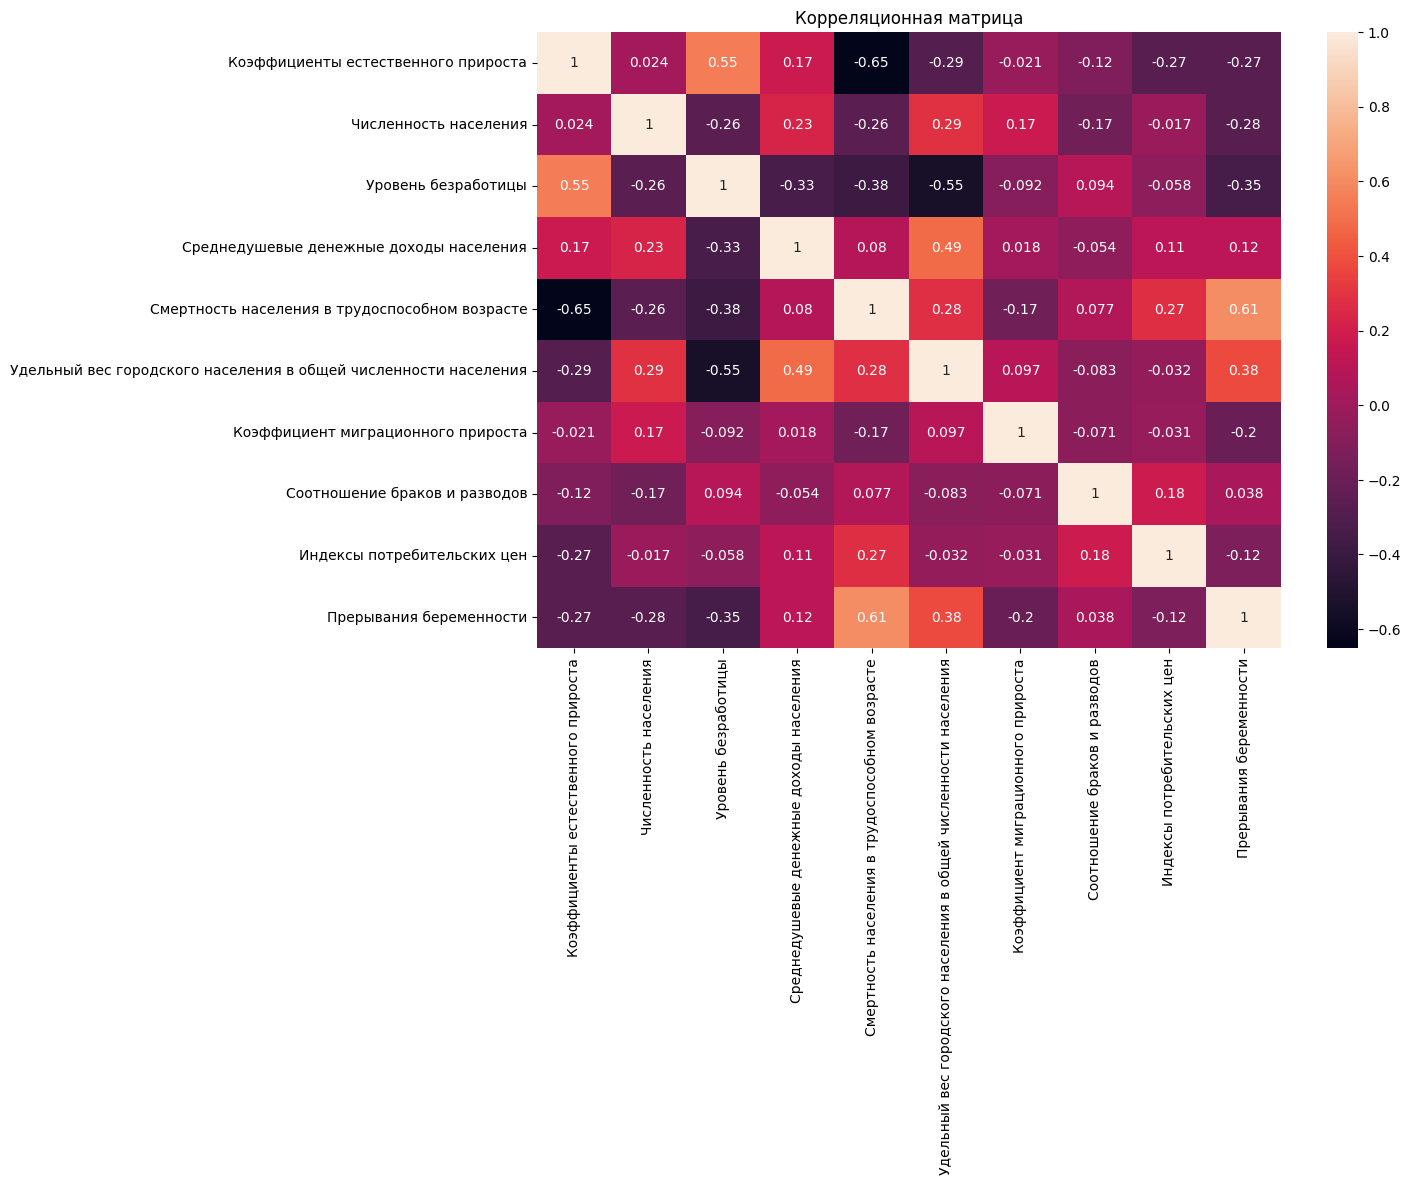

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))
plt.title('Корреляционная матрица')
sns.heatmap(df.iloc[:,2:].corr(), annot=True, fmt='.2g');

Из корреляционной матрицы видно, что регрессоры "Смертность населения в трудоспособном возрасте" и "Уровень безработицы" оказывают наибольшее влияние на "Коэффициенты естественного прироста"

H0 - в данных присутствует мультиколлинеарность

H1 - в данных отсутствует мультиколлинеарность

In [5]:
new_df = df.iloc[:,3:]
R = sp.Matrix(new_df.corr())
det_R = sp.det(R)
det_R

0.111128032294407

In [6]:
k = 9
n = new_df.shape[0]
FG_obs = -(n -1 - 1/6 * (2*k + 5)) * sp.log(det_R)
chi_2 = sts.chi2.isf(0.05, 1/2*k*(k-1))
print(FG_obs, chi_2)

print('H0 отвергаем') if (chi_2 > FG_obs) else print('H0 не отвергаем')

931.924833187780 50.99846016571064
H0 не отвергаем


**Вывод**: мультиколлинеарность существует.

Из корреляционной матрицы видно, что регрессоры "Смертность населения в трудоспособном возрасте" и "Уровень безработицы" оказывают наибольшее влияние на "Коэффициенты естественного прироста". Также не наблюдается высокой зависимости между признаками.

*Проверка наличия мультиколлинеарности каждой переменной с другими*

In [7]:
R_inv = R**(-1)

nu_1 = k
nu_2 = (n - k - 1)
F_tabl = round(sts.f.isf(0.05, nu_1, nu_2), 4)
print(f'F tabl = {F_tabl}')
print('---------------')
for j,r in enumerate(new_df.columns):
    c_jj = R_inv[j, j]
    F_j = round((c_jj - 1) * (n - k - 1) / k, 4)
    print(r, F_j, F_j >= F_tabl)

F tabl = 1.9022
---------------
Численность населения 24.4642 True
Уровень безработицы 34.4937 True
Среднедушевые денежные доходы населения 18.0492 True
Смертность населения в трудоспособном возрасте 55.7509 True
Удельный вес городского населения в общей численности населения 45.8391 True
Коэффициент миграционного прироста 5.1954 True
Соотношение браков и разводов 3.4159 True
Индексы потребительских цен 15.8000 True
Прерывания беременности 56.6482 True


Для данного набора данных табличные значения F-статистики находятся в приемлемых пределах. Кроме того, среди признаков не выделяются сильно зависимые друг от друга переменные.

Полученные результаты не дают оснований для удаления сильно коррелированных признаков.

*Проверка наличия мультиколлинеарности каждой пары переменных*

In [8]:
t_tabl = round(sts.t.isf(0.05/2, n-k-1), 4)
print(f't tabl = {t_tabl}')
print('-----------------')
print('Пары с мультиколлинеарностью')
for i in range(len(new_df)):
    for j in range(i + 1, len(new_df.columns)):
        pair = (new_df.columns[i], new_df.columns[j])
        c_ij = R_inv[i, j]
        c_ii = R_inv[i, i]
        c_jj = R_inv[j, j]
        r_ij = -c_ij / (c_ii * c_jj)**0.5
        t_ij = round((r_ij * (n - k - 1)**0.5) / (1 - r_ij**2)**0.5, 4)
        if abs(t_ij) > t_tabl:
            print(pair, abs(t_ij))

t tabl = 1.9656
-----------------
Пары с мультиколлинеарностью
('Численность населения', 'Уровень безработицы') 5.8115
('Численность населения', 'Смертность населения в трудоспособном возрасте') 4.4216
('Численность населения', 'Удельный вес городского населения в общей численности населения') 5.5793
('Численность населения', 'Соотношение браков и разводов') 2.1601
('Численность населения', 'Прерывания беременности') 5.9545
('Уровень безработицы', 'Среднедушевые денежные доходы населения') 2.2096
('Уровень безработицы', 'Смертность населения в трудоспособном возрасте') 5.4427
('Уровень безработицы', 'Удельный вес городского населения в общей численности населения') 5.4713
('Уровень безработицы', 'Коэффициент миграционного прироста') 2.5130
('Уровень безработицы', 'Прерывания беременности') 2.7273
('Среднедушевые денежные доходы населения', 'Смертность населения в трудоспособном возрасте') 2.3367
('Среднедушевые денежные доходы населения', 'Удельный вес городского населения в общей числ

Наибольшую взаимосвязь среди признаков имеет пара: "Смертность населения в трудоспособном возрасте" и "Прерывания беременности". T-статистика для этой пары составляет 11.3172, что является относительно невысоким показателем для данного набора данных. Согласно матрице корреляций, коэффициент корреляции между этими признаками равен 0.61, что указывает на умеренную связь между ними. 

Таким образом, удаление одного из этих признаков не является необходимым.

**Вывод**: исходя из теста Фаррара-Глоубера, удалять какие-либо признаки не нужно

# Построение моделей панельных данных

### Объединенная модель (модель пула)

In [9]:
df_NEW = df.set_index(['Регион', 'Год'])
y = df_NEW['Коэффициенты естественного прироста']
X = df_NEW.drop(columns=['Коэффициенты естественного прироста'])

X = sm.add_constant(X)
pooledOLS = PanelOLS(y, X)
pooledOLS_fitted = pooledOLS.fit()

t_cr = sts.t.isf(0.05/2, pooledOLS_fitted.df_resid) 
print('t_cr:', round(t_cr, 5))

# пошаговый отбор
while abs(pooledOLS_fitted.tstats).min() < t_cr:
    drop_col = X.columns[list(abs(pooledOLS_fitted.tstats).values).index(abs(pooledOLS_fitted.tstats).min())]
    print(f'Удаляем регрессор <{drop_col}> с t-статистикой = {abs(pooledOLS_fitted.tstats).min()}')
    X = X.drop(columns=[drop_col])
    pooledOLS = PanelOLS(y, X)
    pooledOLS_fitted = pooledOLS.fit()

t_cr: 1.96564
Удаляем регрессор <Численность населения> с t-статистикой = 0.1327519712153308
Удаляем регрессор <Коэффициент миграционного прироста> с t-статистикой = 1.0888591671694685


In [10]:
pooledOLS_fitted.summary

Dep. Variable:,Коэффициенты естественного прироста,R-squared:,0.7308
Estimator:,PanelOLS,R-squared (Between):,0.7629
No. Observations:,429,R-squared (Within):,0.5352
Date:,"Fri, May 31 2024",R-squared (Overall):,0.7308
Time:,20:40:36,Log-likelihood,-1064.5
Cov. Estimator:,Unadjusted,,
,,F-statistic:,163.29
Entities:,87,P-value,0.0000
Avg Obs:,4.9310,Distribution:,"F(7,421)"
Min Obs:,4.0000,,
Max Obs:,5.0000,F-statistic (robust):,163.29


In [11]:
pooledOLS_fitted.s2**0.5 #Стандартная ошибка

2.9206386087525416

Модель пула:

$ Y_{it} = 18.544 + 0.7038 X_{1it} + 0.0002 X_{2it} - 0.0244 X_{3it} - 0.0835 X_{4it} -0.0032 X_{5it} - 0.1375 X_{6it} + 0.1035 X_{7it} + \varepsilon_{it}$

$
\sigma = 2.92 \\
\sigma_{\alpha} = 5.0320 \\
\sigma_{\beta_1} = 0.0482 \\
\sigma_{\beta_2} = 0.00001\\
\sigma_{\beta_3} = 0.0015 \\
\sigma_{\beta_4} = 0.0148 \\
\sigma_{\beta_5} = 0.0008 \\
\sigma_{\beta_6} = 0.0475 \\
\sigma_{\beta_7} = 0.0139 \\
$

In [12]:
F_crit = sts.f.isf(0.05, pooledOLS_fitted.df_model, pooledOLS_fitted.df_resid)
F_crit

1.9603996288292498

Коэффициент детерминации = 0.7308, F-статистика = 163.29 => Качество модели хорошее

### Модель с фиксированными эффектами

In [23]:
y = df_NEW['Коэффициенты естественного прироста']
X = df_NEW.drop(columns=['Коэффициенты естественного прироста'])

fixed_OLS = PanelOLS(y, X, entity_effects=True)
fixed_OLS_fitted = fixed_OLS.fit()

t_cr = sts.t.isf(0.05/2, fixed_OLS_fitted.df_resid) 
print('t_cr:', round(t_cr, 5))

# пошаговый отбор
while abs(fixed_OLS_fitted.tstats).min() < t_cr:
    drop_col = X.columns[list(abs(fixed_OLS_fitted.tstats).values).index(abs(fixed_OLS_fitted.tstats).min())]
    print(f'Удаляем регрессор <{drop_col}> с t-статистикой = {abs(fixed_OLS_fitted.tstats).min()}')
    X = X.drop(columns=[drop_col])
    fixed_OLS = PanelOLS(y, X, entity_effects=True)
    fixed_OLS_fitted = fixed_OLS.fit()

t_cr: 1.96711
Удаляем регрессор <Численность населения> с t-статистикой = 0.32770305974514274
Удаляем регрессор <Индексы потребительских цен> с t-статистикой = 1.643753750795238


In [24]:
fixed_OLS_fitted

Dep. Variable:,Коэффициенты естественного прироста,R-squared:,0.7836
Estimator:,PanelOLS,R-squared (Between):,-0.2432
No. Observations:,429,R-squared (Within):,0.7836
Date:,"Fri, May 31 2024",R-squared (Overall):,-0.1459
Time:,20:41:47,Log-likelihood,-593.04
Cov. Estimator:,Unadjusted,,
,,F-statistic:,173.32
Entities:,87,P-value,0.0000
Avg Obs:,4.9310,Distribution:,"F(7,335)"
Min Obs:,4.0000,,
Max Obs:,5.0000,F-statistic (robust):,173.32


In [25]:
fixed_OLS_fitted.s2**0.5 #Стандартная ошибка

1.090997560990183

Модель с фиксированными эффектами:

$ Y_{it} = \hat{\alpha_i} - 0.1582 X_{1it} - 0.000067 X_{2it} - 0.0263 X_{3it} + 0.2216 X_{4it} -0.0026 X_{5it} - 0.0007 X_{6it} + 0.0682 X_{7it} + \varepsilon_{it}$

$\hat{\alpha_i} $ - оцененные константы для каждого региона РФ

$
\sigma = 1.091 \\
\sigma_{\beta_1} = 0.0643 \\
\sigma_{\beta_2} = 0.0000153 \\
\sigma_{\beta_3} = 0.0012\\
\sigma_{\beta_4} = 0.0955 \\
\sigma_{\beta_5} = 0.0010 \\
\sigma_{\beta_6} = 0.0003 \\
\sigma_{\beta_7} = 0.0190 \\
$

In [26]:
F_crit = sts.f.isf(0.05, fixed_OLS_fitted.df_model, fixed_OLS_fitted.df_resid)
F_crit

1.2976328388014997

Коэффициент детерминации = 0.7836, F-статистика = 173.32 => Качество модели хорошее.

Коэффициент детерминации и F-статистика у модели FE больше, чем у модели POOL

### Модель со случайными эффектами

In [29]:
y = df_NEW['Коэффициенты естественного прироста']
X = df_NEW.drop(columns=['Коэффициенты естественного прироста'])

X = sm.add_constant(X)
random_effects_model = RandomEffects(y, X)
random_effects_model_fitted = random_effects_model.fit()

t_cr = sts.t.isf(0.05/2, random_effects_model_fitted.df_resid) 
print('t_cr:', round(t_cr, 5))

# пошаговый отбор
while abs(random_effects_model_fitted.tstats).min() < t_cr:
    drop_col = X.columns[list(abs(random_effects_model_fitted.tstats).values).index(abs(random_effects_model_fitted.tstats).min())]
    print(f'Удаляем регрессор <{drop_col}> с t-статистикой = {abs(random_effects_model_fitted.tstats).min()}')
    X = X.drop(columns=[drop_col])
    random_effects_model = RandomEffects(y, X)
    random_effects_model_fitted = random_effects_model.fit()

t_cr: 1.96564
Удаляем регрессор <Численность населения> с t-статистикой = 1.1881116399531515
Удаляем регрессор <Соотношение браков и разводов> с t-статистикой = 1.5128134300388936
Удаляем регрессор <Индексы потребительских цен> с t-статистикой = 1.744469162217298
Удаляем регрессор <Среднедушевые денежные доходы населения> с t-статистикой = 1.3805164503460499
Удаляем регрессор <Удельный вес городского населения в общей численности населения> с t-статистикой = 1.0957828857045415
Удаляем регрессор <Уровень безработицы> с t-статистикой = 1.7877931251391934


In [30]:
random_effects_model_fitted

Dep. Variable:,Коэффициенты естественного прироста,R-squared:,0.7318
Estimator:,RandomEffects,R-squared (Between):,0.3957
No. Observations:,429,R-squared (Within):,0.7651
Date:,"Fri, May 31 2024",R-squared (Overall):,0.4507
Time:,20:42:14,Log-likelihood,-659.39
Cov. Estimator:,Unadjusted,,
,,F-statistic:,386.55
Entities:,87,P-value,0.0000
Avg Obs:,4.9310,Distribution:,"F(3,425)"
Min Obs:,4.0000,,
Max Obs:,5.0000,F-statistic (robust):,386.51


In [31]:
random_effects_model_fitted.s2**0.5 #Стандартная ошибка

1.1306504163056634

Модель со случайными эффектами:

$ Y_{it} = 9.0791 - 0.0286 X_{1it} - 0.0026 X_{2it} + 0.0711 X_{3it} + \hat{u_i} + \varepsilon_{it}$

$\hat{u_i} $ - оцененные случайные эффекты для каждого региона РФ

$
\sigma = 1.13 \\
\sigma_{\alpha} = 1.1475 \\
\sigma_{\beta_1} = 0.0010 \\
\sigma_{\beta_2} = 0.0010 \\
\sigma_{\beta_3} = 0.0154\\
$

In [32]:
F_crit = sts.f.isf(0.05, random_effects_model_fitted.df_model, random_effects_model_fitted.df_resid)
F_crit

2.3929297121248037

Коэффициент детерминации = 0.7318, F-статистика = 386.55 => Качество модели хорошее.

Коэффициент детерминации модели RE немного выше, чем у модели POOL, но ниже, чем у модели с фиксированными эффектами FE. F-статистика для модели RE является наилучшей среди всех рассматриваемых моделей. Однако, в отличие от других моделей, в модели RE используется меньшее количество регрессоров, всего 3, что делает её менее робастной по сравнению с остальными моделями.

# Сравнение моделей

### Сравнение модели пула с моделью с фиксированными эффектами

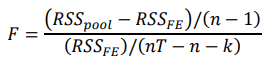

H0: $u_1 = ... = u_i = ... = u_n$

In [33]:
def pool_vs_fe_test(pool, fe, alpha=0.05):
    n = pool.nobs
    fe_n_resids = fe.df_model
    RSS_fe = fe.resid_ss
    RSS_pool = pool.resid_ss
    F_comp = ((RSS_pool-RSS_fe)/(n-1))/(RSS_fe/fe_n_resids)
    F_crit = sts.f.isf(alpha, n-1, fe_n_resids)
    print(f'F-критическое: {F_crit:.4f}')
    print(f'Расчетное значение статистики F: {F_comp:.4f}')
    if F_comp < F_crit:
        print(f'{F_comp:.4f} < {F_crit:.4f}. H0 не отклоняется, выбираем модель пула')
    else:
        print(f'{F_comp:.4f} > {F_crit:.4f}. H0 отклоняется, выбираем модель с фиксированными эффектами')
pool_vs_fe_test(pooledOLS_fitted, fixed_OLS_fitted)

F-критическое: 1.3220
Расчетное значение статистики F: 1.7584
1.7584 > 1.3220. H0 отклоняется, выбираем модель с фиксированными эффектами


### Сравнение модели с фиксированными эффектами с моделью со случайными эффектами

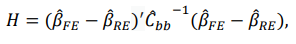

H0: $Cov(u_i, x_{jt}) = 0$

H1: $Cov(u_i, x_{jt}) ≠ 0$

где:

1. $u_i$ - индивидуальные парамаетры местоположения в FE-модели;
2. $u_i = u + m_i$ - сумма параметра местоположения общего для всех регионов и случайного возмущения для каждого региона

In [34]:
def hausman_test(fe, re, alpha=0.05):
    fe_regr = pd.DataFrame(fe.params).index
    re_regr = pd.DataFrame(re.params).index
    common_regr = fe_regr.intersection(re_regr)
    
    delta_params = fe.params[common_regr] - re.params[common_regr]
    delta_cov = fe.cov[common_regr].T[common_regr] - re.cov[common_regr].T[common_regr]
    hausman_statistic = float((sp.Matrix(delta_params).T * sp.Matrix(delta_cov)**(-1) * sp.Matrix(delta_params))[0])
    df = delta_params.size
    chi_cr = sts.chi.isf(alpha,df)
    print(f'𝜒^2-критическое: {chi_cr:.4f}')
    print(f'Расчетное значение статистики H: {hausman_statistic:.4f}')
    if hausman_statistic > chi_cr:
        print(f'{hausman_statistic:.4f} > {chi_cr:.4f}. H0 отклоняется, выбираем модель с фиксированными эффектами')
    else:
        print(f'{hausman_statistic:.4f} < {chi_cr:.4f}. H0 не отклоняется, выбираем модель со случайными эффектами')
hausman_test(fixed_OLS_fitted, random_effects_model_fitted)

𝜒^2-критическое: 2.7955
Расчетное значение статистики H: 22.0269
22.0269 > 2.7955. H0 отклоняется, выбираем модель с фиксированными эффектами


**Вывод**: по результатам сравнения моделей была выбрана модель с фиксированными эффектами

# Прогнозирование на основе выбранной модели

In [35]:
test_df = pd.read_excel('ДТЗ_2_Данные.xlsx', sheet_name='Sheet1', decimal=',').iloc[[351, 376, 388, 408, 422, 434], :]
test_df.head(6)

,Регион,Год,Коэффициенты естественного прироста,Численность населения,Уровень безработицы,Среднедушевые денежные доходы населения,Смертность населения в трудоспособном возрасте,Удельный вес городского населения в общей численности населения,Коэффициент миграционного прироста,Соотношение браков и разводов,Индексы потребительских цен,Прерывания беременности
351,Воронежская область,2022,-7.8,2285.3,3.5,39319,567.9,68.5,3.0,598,112.34,27.6
376,Псковская область,2022,-11.0,587.8,4.0,33090,785.8,70.9,-44.0,638,112.04,69.3
388,Кабардино-Балкарская Республика,2022,2.4,903.3,10.0,30173,326.5,51.8,-36.0,964,111.90,12.6
408,Свердловская область,2022,-4.5,4239.1,3.5,46187,619.2,85.8,-12.0,629,111.83,62.2
422,Омская область,2022,-5.4,1832.1,5.3,34747,593.7,73.6,-53.0,604,110.94,33.9
434,Чукотский авт.округ,2022,0.4,47.8,1.9,114456,968.5,69.1,-18.0,506,105.67,58.1


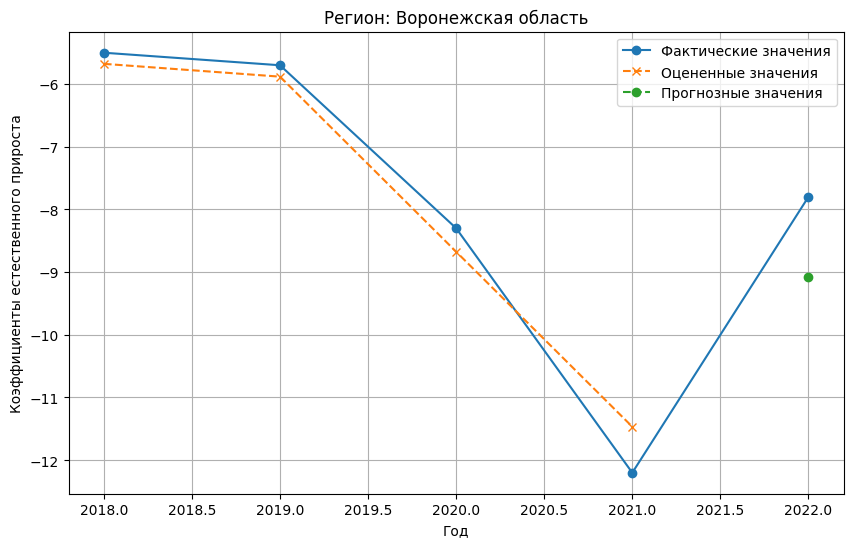

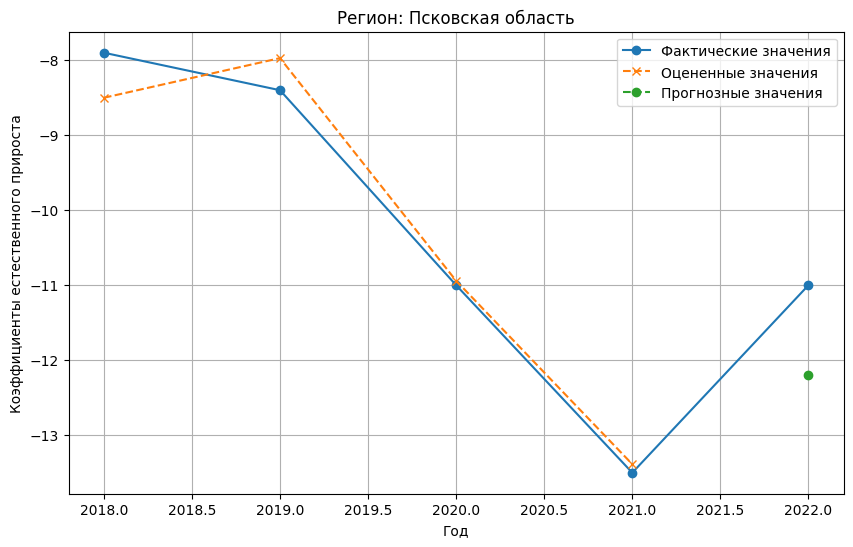

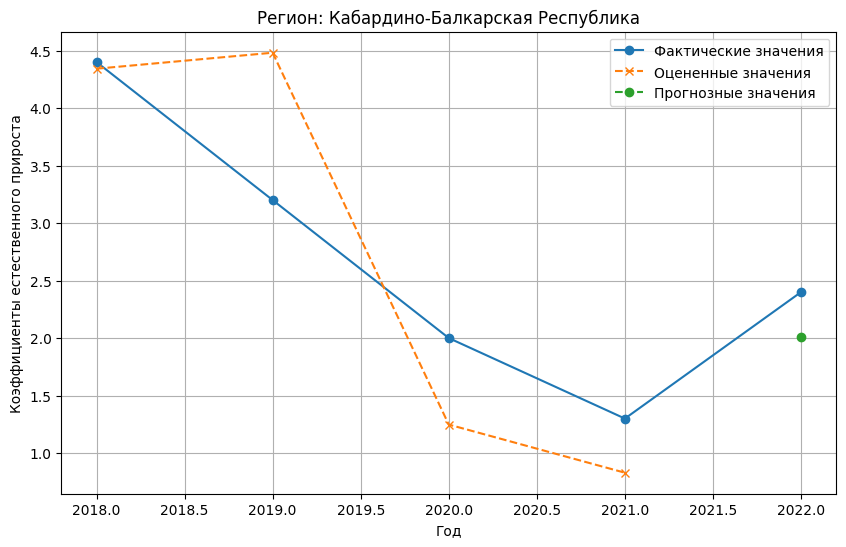

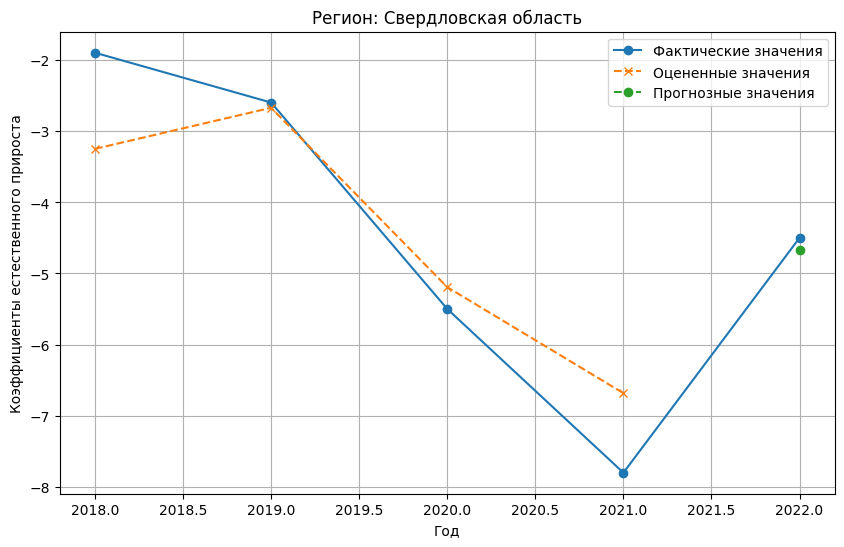

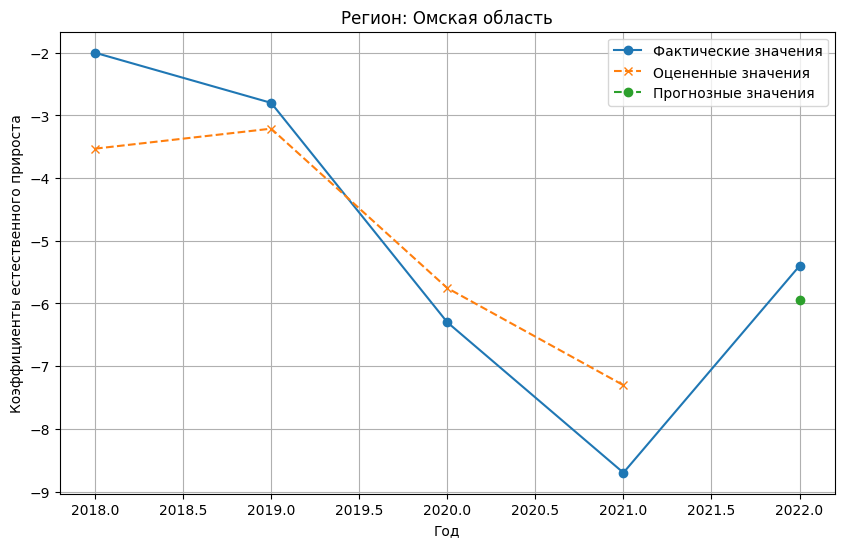

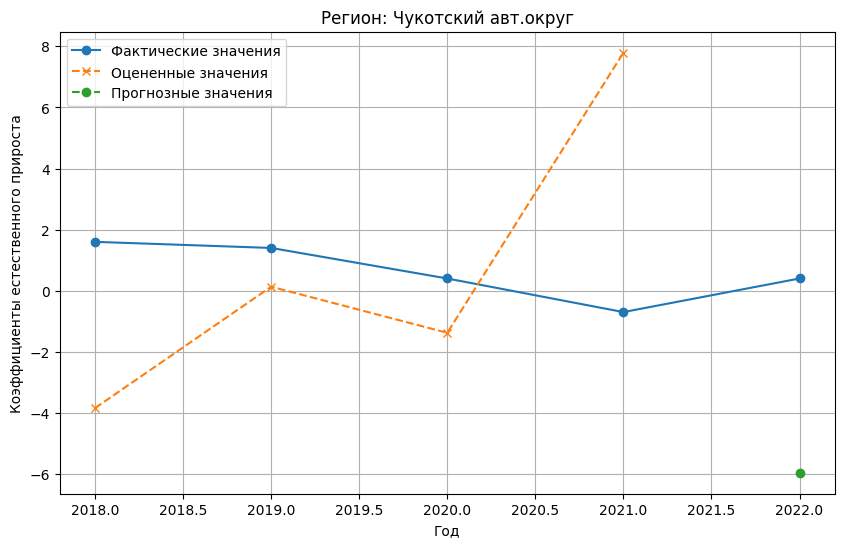

In [36]:
test_regions = test_df['Регион']

for region in test_regions:
    real_train = df[df['Регион'] == region]['Коэффициенты естественного прироста'].tolist()
    real_test = test_df[test_df['Регион'] == region]['Коэффициенты естественного прироста'].tolist()
    real_values = real_train + real_test

    X_train = df[df['Регион'] == region].drop(columns=['Коэффициенты естественного прироста',
                                                       'Численность населения',
                                                       'Индексы потребительских цен']).set_index(['Регион', 'Год'])
    X_test = test_df[test_df['Регион'] == region].drop(columns=['Коэффициенты естественного прироста',
                                                                'Численность населения',
                                                                'Индексы потребительских цен']).set_index(['Регион', 'Год'])
    
    est_eff_reg = fixed_OLS_fitted.estimated_effects.loc[(region)].values[0][0]
    estimated_train = (fixed_OLS_fitted.predict(X_train) + est_eff_reg).values
    estimated_values = estimated_train.tolist() + [fixed_OLS_fitted.predict(X_test).values[0][0] + est_eff_reg]

    years = np.arange(2018, 2023)
    
    plt.figure(figsize=(10, 6))
    plt.plot(years, real_values, label='Фактические значения', marker='o')
    plt.plot(years[:len(estimated_train)], estimated_train, label='Оцененные значения', linestyle='--', marker='x')
    plt.plot(years[len(estimated_train):], estimated_values[len(estimated_train):], label='Прогнозные значения', linestyle='--', marker='o')
    
    plt.xlabel('Год')
    plt.ylabel('Коэффициенты естественного прироста')
    plt.title(f'Регион: {region}')
    plt.legend()
    plt.grid(True)
    plt.show()

**Вывод**: с помощью модели с фиксированными эффектами были рассчитаны прогнозные значения коэффициента естественного прироста населения для 6 регионов из разных федеральных округов РФ. Сравнение реальных значений с прогнозными показало, что лишь в Чукотском автономном округе прогнозное значение значительно отклонилось от реального. В Кабардино-Балкарской Республике, Свердловской области и Омской области предсказанные значения хорошо согласуются с фактическими данными. В Воронежской области и Псковской области согласие немного хуже, но направление тренда правильно предсказано. Это свидетельствует о высокой прогностической способности выбранной модели.

# Выводы

Модели панельных данных позволили с высоким качеством смоделировать зависимость коэффициента естественного прироста от социально-экономических показателей. Так как они увеличивают объем наблюдений и позволяют строить более точные модели, учитывающие региональные особенности. 

В данной работе были рассмотрены три типа моделей панельных данных, и проведен их сравнительный анализ с использованием тестов. Наилучшей моделью оказалась модель с фиксированными эффектами (FE), обеспечивающая высокую точность прогнозов. Также данный тип модели позволяет учитывать характеристики каждого региона, которые могут включать культурные особенности, исторические факторы, инфраструктуру и т.п., которые могут существенно влиять на коэффициент естественного прироста, но остаются неизменными в течение исследуемого периода.

Это исследование будет особенно полезным для определения факторов, которые наиболее сильно влияют на естественный прирост населения в регионах. На основе этих знаний можно принимать целенаправленные решения для улучшения демографической ситуации в России, что особенно важно в настоящее время.

# Список литературы

1) Клопков К.А. Воздействие социально-экономических факторов на коэффициент рождаемости в субъектах Российской Федерации // Научные записки молодых исследователей. – 2021.

2) Симагин Ю.А. Проблема депопуляции как ограничение социально-экономического развития муниципальных образований России // Экономика.Налоги.Право. – 2018.

3) Орлова И.В. Исследование взаимосвязи коэффициента рождаемости и индекса цен в субъектах РФ с помощью квантильной регрессии // Фундаментальные исследования. – 2021.

4) Наумкин С.С. Влияние демографических процессов на экономический потенциал Северо-Кавказского федерального округа / Наумкин С.С., Хаджиогло А.Ф. — Текст: электронный // Российский экономический интернет-журнал. – 2020.

5) Кузнецова М.В. Оценка уровня жизни населения в Российской Федерации / Кузнецова М.В., Зиновьева Е.Г., Лимарева Ю.А. — Текст: электронный // Теоретическая экономика. – 2023.

6) Семенова В.А. Влияние абортов на рождаемость в России за период с 2005 по 2018гг. // Международный научный журнал "Символ науки" -  2021.